# Neural Network for Handwritten Digit Recognition using the MNIST dataset

## Loading the libraries

In [97]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt

## Loading the dataset

In [101]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

### Summarize loaded dataset

In [102]:
print('Train: X=%s, y=%s' % (train_X.shape, train_y.shape))
print('Test: X=%s, y=%s' % (test_X.shape, test_y.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


### Let's plot some few images

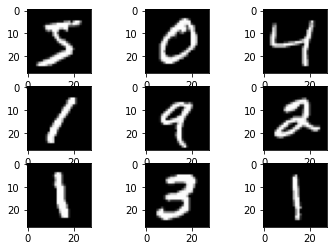

In [103]:
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(train_X[i], cmap=plt.get_cmap('gray'))
# show the figure
plt.show()

## Reshaping the data

In [ ]:
train_images = train_X.reshape((60000, 28 * 28))
test_images = test_X.reshape((10000, 28 * 28))

print('Train: X=%s, y=%s' % (train_images.shape, train_labels.shape))
print('Test: X=%s, y=%s' % (test_images.shape, test_labels.shape))

## Normalizing the data

The pixel values for each image in the dataset are unsigned integers in the range between black and white, or 0 and 255. The pixel values of grayscale images has to be rescaled to the range [0 , 1] This involves also converting the data type from unsigned integers to floats.

In [105]:
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255

train_labels = train_y
test_labels = test_y

## The network architecture

In [113]:
tf.random.set_seed(1234) # for consistent results
model = keras.Sequential(
    [   
        layers.Dense(25, activation = 'relu'),
        layers.Dense(15, activation = 'relu'),
        layers.Dense(10, activation = 'softmax')    # < softmax activation here
    ], name = "mnist_model" 
)

## The compilation step

Use only one of these methods

### Method 1

In [114]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(), #from_logits=True
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=["accuracy"])

### Method 2

In [89]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

## Training the model

In [146]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=128) #, validation_split = 0.2

Epoch 1/20
469/469 [==============================] - 0s 895us/step - loss: 0.0587 - accuracy: 0.9840
Epoch 2/20
469/469 [==============================] - 0s 893us/step - loss: 0.0468 - accuracy: 0.9864
Epoch 3/20
469/469 [==============================] - 0s 825us/step - loss: 0.0404 - accuracy: 0.9885
Epoch 4/20
469/469 [==============================] - 0s 924us/step - loss: 0.0365 - accuracy: 0.9890
Epoch 5/20
469/469 [==============================] - 0s 883us/step - loss: 0.0355 - accuracy: 0.9885
Epoch 6/20
469/469 [==============================] - 0s 873us/step - loss: 0.0345 - accuracy: 0.9893
Epoch 7/20
469/469 [==============================] - 0s 907us/step - loss: 0.0316 - accuracy: 0.9902
Epoch 8/20
469/469 [==============================] - 0s 866us/step - loss: 0.0306 - accuracy: 0.9905
Epoch 9/20
469/469 [==============================] - 0s 906us/step - loss: 0.0289 - accuracy: 0.9911
Epoch 10/20
469/469 [==============================] - 0s 923us/step - loss: 0.029

## Plotting

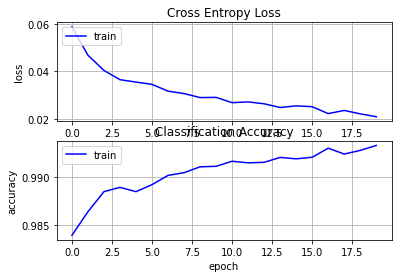

In [147]:
# plot loss
plt.subplot(2, 1, 1)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
#plt.plot(history.history['val_loss'], color='orange', label='test')
plt.ylabel('loss')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
# plot accuracy
plt.subplot(2, 1, 2)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
#plt.plot(history.history['val_accuracy'], color='orange', label='test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.grid()
plt.show()
 

## Analysing the model

### Examining weights shapes

In [148]:
[layer1, layer2, layer3] = model.layers

W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()

print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")

W1 shape = (784, 25), b1 shape = (25,)
W2 shape = (25, 15), b2 shape = (15,)
W3 shape = (15, 10), b3 shape = (10,)


### Model summary

In [149]:
model.summary()

Model: "mnist_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 25)                19625     
                                                                 
 dense_13 (Dense)            (None, 15)                390       
                                                                 
 dense_14 (Dense)            (None, 10)                160       
                                                                 
Total params: 20,175
Trainable params: 20,175
Non-trainable params: 0
_________________________________________________________________


## Testing the model on new data 

What is the accuracy of the testing step?

In [150]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 0s 587us/step - loss: 0.2037 - accuracy: 0.9632
test_acc: 0.9631999731063843


## Using the model to make predictions 

In [81]:
test_digits = test_images[0:10]
predictions = model.predict(test_digits)

1/1 [==============================] - 0s 13ms/step


array([1.2984315e-08, 2.6523919e-10, 6.6203306e-06, 5.9294875e-04,
       1.5553175e-12, 5.8397501e-07, 3.1773819e-13, 9.9939859e-01,
       2.5168052e-07, 9.0921918e-07], dtype=float32)

### Let's choose a label from 0 to 10

In [111]:
label = 0

In [112]:
predictions[label]
test_labels[label]
predictions[label].argmax()
predictions[label][7]

0.9993986

7

7

0.9993986